In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

test = cv2.imread("../Imgs/pinguim.jpg", 1)

smile = cv2.imread("smile.png", 1)
smile = cv2.resize(smile, (200, 200))

pos = [200, 200]

In [2]:
gs = cv2.cvtColor(smile, cv2.COLOR_BGR2GRAY)

_, th = cv2.threshold(gs, 127, 255, cv2.THRESH_BINARY_INV)

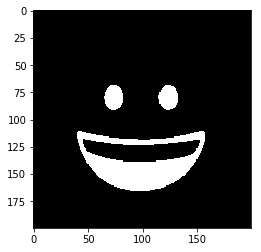

In [3]:
plt.imshow(th, cmap = "gray")

In [4]:
smile = cv2.cvtColor(th, cv2.COLOR_GRAY2BGR)

In [10]:
cap = cv2.VideoCapture(0)

face_cascade = cv2.CascadeClassifier('lbp_class/lbpcascade_frontalface.xml')
#eye_cascade = cv2.CascadeClassifier('class/lbpcascade_eye_tree_eyeglasses.xml')


i = 0

while cap.isOpened():
    i += 1
    i = i % 100
    ret, frame = cap.read()
    if ret == True:
        gs = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        faces = face_cascade.detectMultiScale(gs, scaleFactor=1.3, minNeighbors=2)
        #eyes = eye_cascade.detectMultiScale(gs, scaleFactor = 1.3,  minNeighbors = 5)
        #print(len(faces))
        
        #img_c = img.copy()
        for (x,y,w,h) in faces:
            #cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),8)
            pos[0] = int(0.2 * x + 0.8 * pos[0])
            pos[1] = int(0.2 * y + 0.8 * pos[1])
            if i == 0:
                print(pos[0], pos[1])
            
            frame[max(0, pos[1]):min(frame.shape[0], pos[1] + smile.shape[0]), max(0, pos[0]) : \
              min(frame.shape[1], pos[0] + smile.shape[1])] = cv2.addWeighted(frame[max(0, pos[1]):\
              min(frame.shape[0], pos[1] + smile.shape[0]), max(0, pos[0]) : \
              min(frame.shape[1], pos[0] + smile.shape[1])], 1, smile, 1, 0)
#             frame[max(0, pos[1]):min(frame.shape[0], pos[1] + smile.shape[0]), max(0, pos[0]) : \
#               min(frame.shape[1], pos[0] + smile.shape[1])] = smile

        
#         for (x, y, w, h) in eyes:
#             cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),4)
            
        cv2.imshow("frame", frame)
        
#         if cv2.waitKey(1):
#             if 0xFF == ord("t"):
#                 cv2.imshow("foto", frame)
        
        key = cv2.waitKey(1) & 0xFF
        
        if key == ord("t"):
            cv2.imshow("foto", frame)
        if key == ord("q"):
            break

cap.release()
cv2.destroyAllWindows()

In [6]:
cap.release()
cv2.destroyAllWindows()

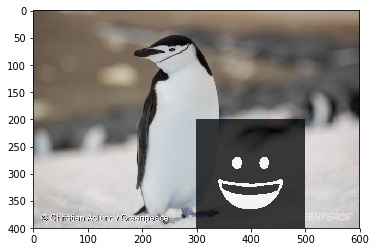

In [9]:
test[test.shape[0]//2:test.shape[0]//2+200, \
test.shape[1]//2: test.shape[1]//2+200] = cv2.addWeighted(test[test.shape[0]//2:test.shape[0]//2+200, \
                                test.shape[1]//2: test.shape[1]//2+200], 0.5, smile, 0.5, 0)

plt.imshow(test)

In [8]:
test.shape

(400, 600, 3)

In [9]:
test[test.shape[0]//2:test.shape[0]//2+200, test.shape[1]//2: test.shape[1]//2+200].shape

(200, 200, 3)